---

# Concurrent System Design
### [Emil Sekerinski](http://www.cas.mcmaster.ca/~emil/), McMaster University, Fall 2019

---


## 1. Examples of Concurrency


### Example 1: Operating Systems
Historically, operating systems supported *multiprocessing* with a single *processor*:

- The processor switches among programs (*processes*) after a short *time slice*. 
- When one program is *blocked* on I/O, the processor also switches to another program.

This provides the illusion that programs run in parallel. Programs may not directly interact, but need to _sychronize_ access to common resources like a file storage, printer, or network. Thus concurrency and synchronization became part of books on operating systems and are still!

<figure style="width: 30%;float: left;border-right:30px solid white;">
    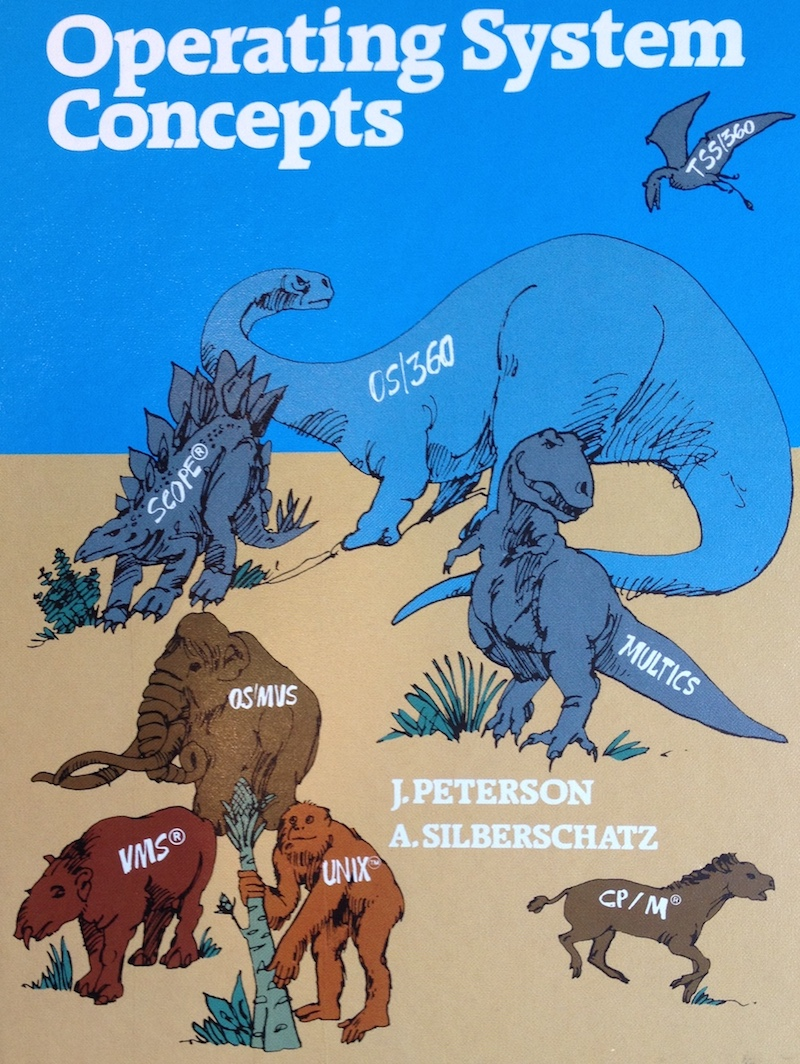
    <figcaption style="text-align: center;">
    </figcaption>
</figure>

Book from 1983:

1. Introduction
2. Operating System Services
3. File Systems
4. CPU Scheduling
5. Memory Management
6. Virtual Memory
7. Disk and Drum Scheduling
8. Deadlocks
9. Concurrent Processes
10. Concurrent Programming
11. Protections
12. Design Principles
13. Distributed Systems
13. Historical Perspective

<a href="https://github.com/codepath/android_guides/wiki/Managing-Threads-and-Custom-Services">
    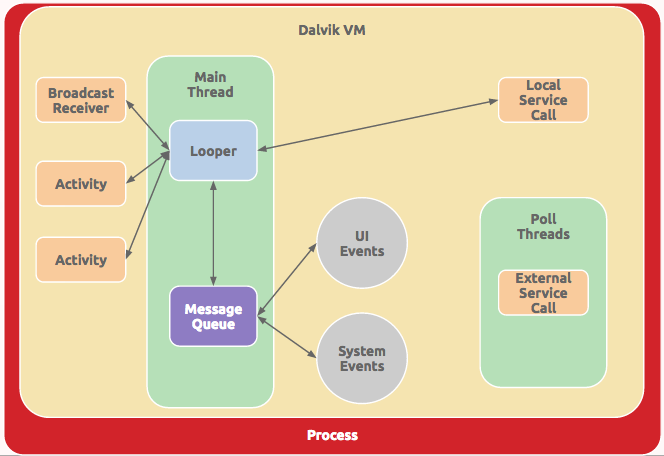
</a>

### Example 2: Interactive Programs

From [Android Guides](https://github.com/codepath/android_guides/wiki/Managing-Threads-and-Custom-Services):
> The main thread ... is in charge of dispatching events and rendering the user interface and is usually called the _UI thread_. All components (activities, services, etc) ... run in the same process and are instantiated by default in the UI thread.

> ... performing long operations such as network access or database queries in the UI thread will block the entire app UI from responding. When the UI thread is blocked, no events can be dispatched, including drawing events. From the user's perspective, the application will appear to freeze. 

> Additionally, ... the Android UI toolkit is not thread-safe and as such you must not manipulate your UI from a background thread ... two rules:

> - Do not run long tasks on the main thread (to avoid blocking the UI)
> - Do not change the UI at all from a background thread (only the main thread)

Programs under [Windows](https://msdn.microsoft.com/en-us/library/ff649143.aspx) have a similar structure.

<a href="https://github.com/bpmn-io/bpmn-js-examples/tree/master/colors">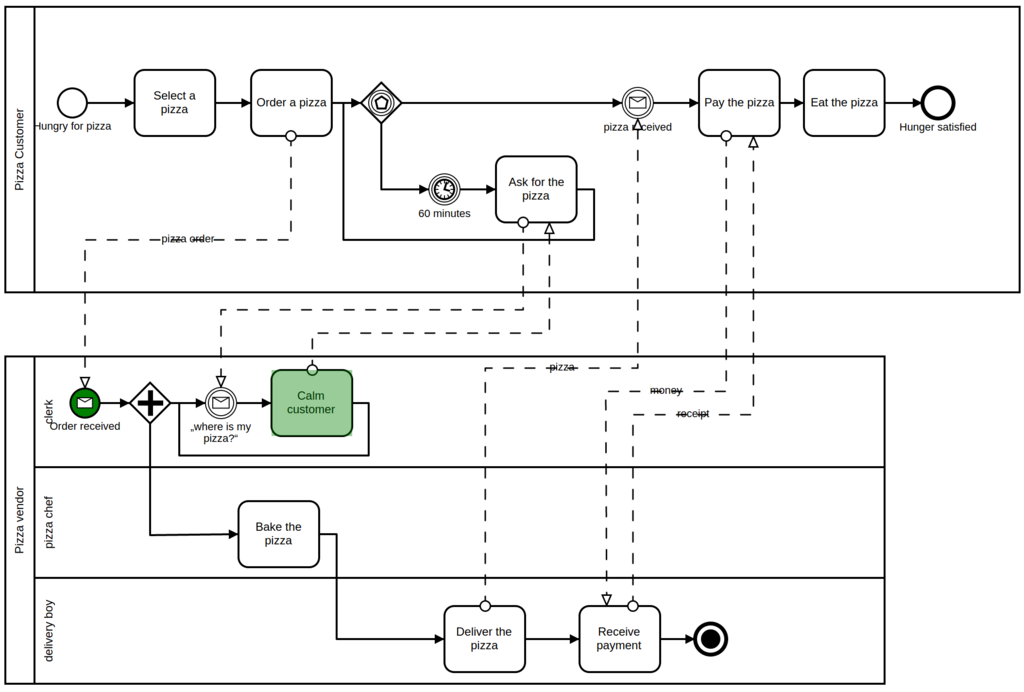</a>

### Example 3: Requirements Analysis

The [Business Process Modelling Notation](http://www.bpmn.org/) (BPMN) serves for describing the interactions between agents in business processss. BPMN diagrams are similar to flowcharts, but they are not meant to be executed, they only serve for documenting the setting for which software is to be developed. (BPMN elements are also supported in [draw.io](draw.io) and Vizio.)

Other requirements analysis techniques are textual. Being able to express concurrency is essential as the surrounding world is concurrent.


### Example 4: Parallel Computing
<figure style="width: 30%;float: right;border-left:10px solid white;">
    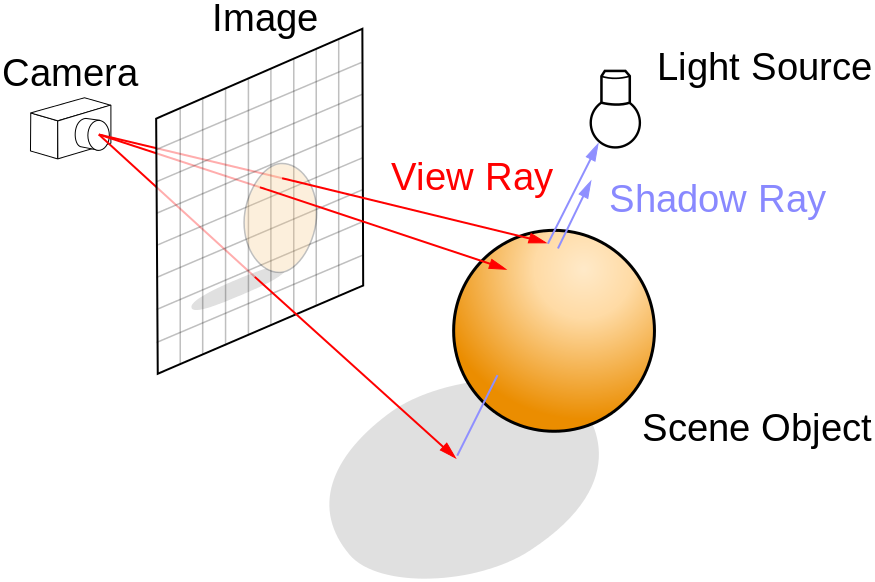
    <figcaption style="text-align: center;">
        <small><a href="https://en.wikipedia.org/wiki/Ray_tracing_(graphics)">Wikipedia</a></small>
    </figcaption>
</figure>
Ray tracing is a technique to render raster images of a three-dimensional scene, e.g. in animations. For all pixels of the image, rays are traced "backwards" from the camera (eye) until they hit an object of the scene. From there, the reflecting and refracting rays are traced until they hit a light source. This process is recursively repeated as objects may be in the shadow of other objects. The color and intensity of a pixel is then calculated based on the reflecting and refracting properties of the traced objects and the color of the light source. The run-time for each pixel is proportional to the number of light sources, proportional to the number of rays spawned by every object hit, and exponential in the depth of the recursion.

As light rays do not influence each other, all pixels of a frame and all frames of an animation can be computed in parallel. With 4K resolution (3840 × 2160 pixels) and 24 frames per second, a 110 min animation needs 1.3 × 10¹² pixels computed. For all rays needed for one pixel, the intersection of the ray with any object needs to be determined.

<img style="width:60%;border-right:10px solid white" align="left" src="./pixar-processors.jpg"/>

<a href="http://fortune.com/2015/09/14/pixar-brings-movies-life/">How Pixar brings its animated movies to life, Fortune, Sept 2015</a>:

> It took around 3,000 processors to render the movies The Incredibles and Cars, two films from the mid 2000s. For more recent films like Monsters University and Inside Out, that number has soared to around 20,000 processors.

> All that extra processing power is noticeable when you study the hairs of the animated creature, Sulley, ... . When the original Monsters movie first appeared in 2001, Sulley had 1.1 million hairs covering his body. By Monsters University, released in 2013, Sulley had 5.5 million individual hairs.

<figure style="width: 30%;float: right;border-left:10px solid white;">
    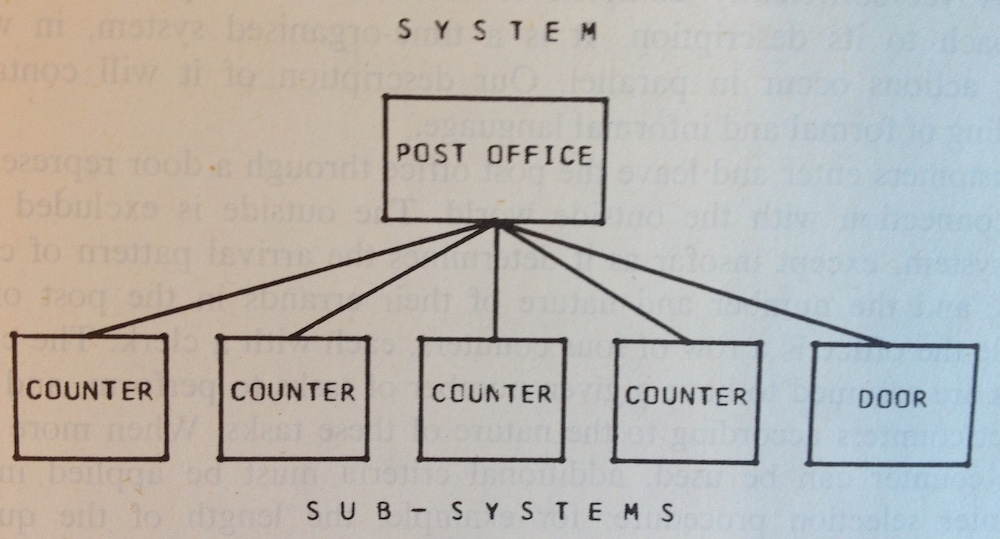<br>
    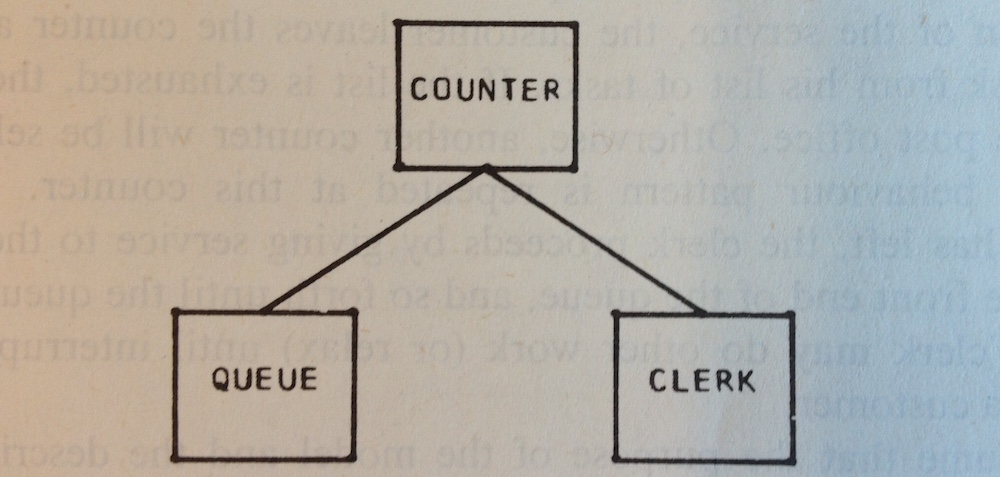<br>
    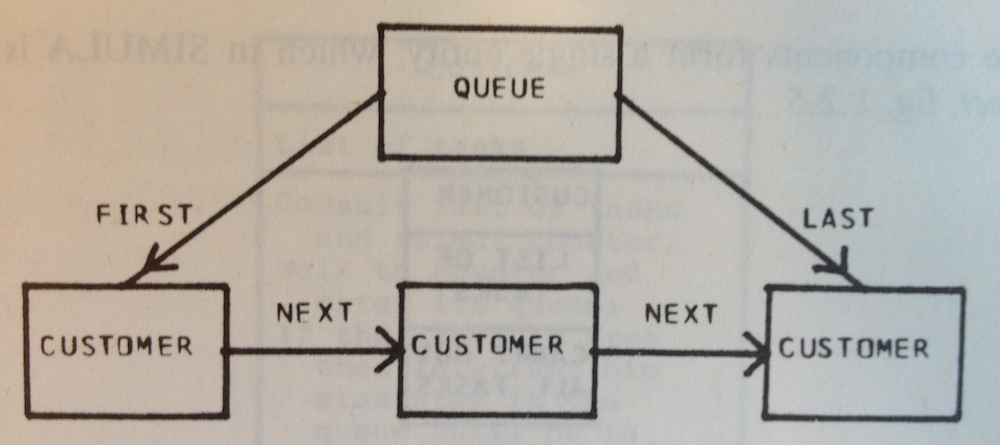<br>
    <figcaption style="text-align: center;">
        <small>From Birtwhistle, Dahl, Myhrhaug, Nygaard. <i>Simula Begin</i>, 1979.</small>
    </figcaption>
</figure>

### Example 5: Software Design

Object-oriented design allows that the structure of program, the class hierarchy, reflects the structure of the problem domain: _a description of the problem becomes part of the solution_.

Simula-67, the first object-oriented languages, supported _coroutines_ that allowed objects to be concurrent, particularly for simulations. Coroutines are scheduled *cooperatively*, meaning that transfer for control is explicit, unlike preemptively scheduled threads. (Coroutines are called [fibers](https://msdn.microsoft.com/en-us/library/windows/desktop/ms682661.aspx) in Windows and are related to goroutines in Go; subsequent object-oriented languages, notably Smalltalk-80 and later C++, did not follow Simula in that respect.)

The overview to the right is for a simulation program for a post office: in principle, customers and clerks are all concurrent.

Embedded systems have to react to environmental events. As these can be independent, a natural structure is by having concurrent processes reacting to different kinds of events. Below is a <a href="https://doi.org/10.1016/0167-6423(87)90035-9"><i>statechart</i></a> for an alarm (statecharts are related to UML state machines). For example, light and alarm status are independent and expressed as *concurrent states*, visually seperated by dashed lines.

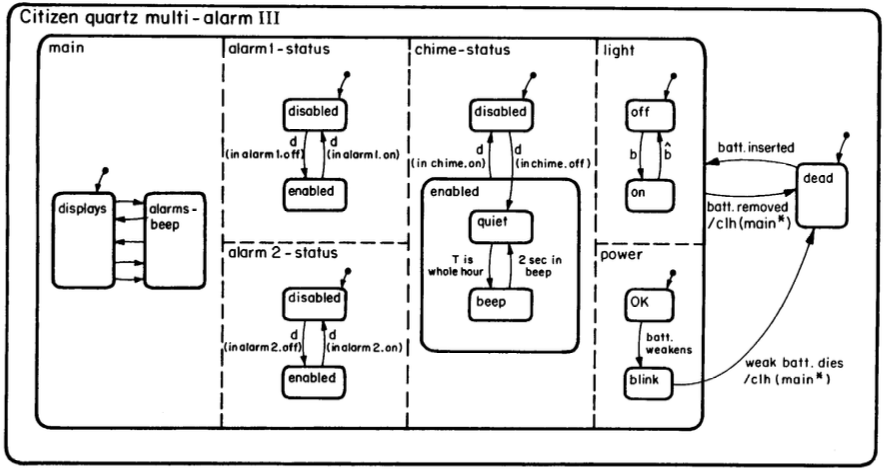

### Example 6: Server Architecture

<figure style="width: 70%;float: right;border-left:10px solid white;">
    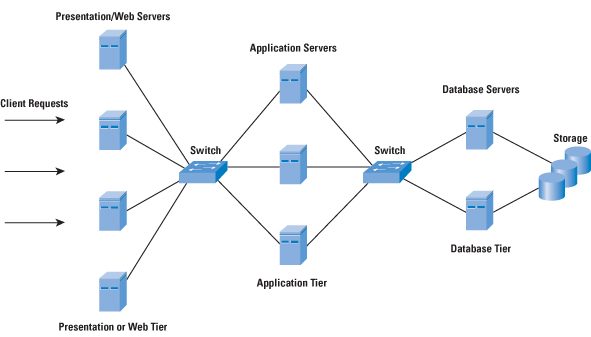
    <figcaption style="text-align: center;">
        <small><a href="https://www.cisco.com/c/en/us/about/press/internet-protocol-journal/back-issues/table-contents-46/124-cloud2.html">Cloud Computing - A Primer, Cisco.</a></small>
    </figcaption>
</figure>

An early server architecture is the *three-tier architecture*: presentation, application, and database servers are all concurrent. They may run on the same computer or on different computers.

(The architecture does not scale well beyond a certain size; data centers for cloud computing connect servers differently, with a "fat tree".)

### Example 7: Protocols

<figure style="width: 70%;float: right;border-left:10px solid white;">
    <a href="https://commons.wikimedia.org/w/index.php?curid=2666326">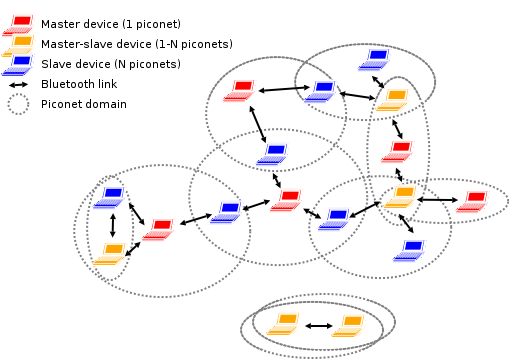</a>
    <figcaption style="text-align: right;">
        <br><small>By Rob Blanco - Own work, CC BY-SA 2.5 es</small>
    </figcaption>
</figure>

Bluetooth is a protocol for personal area networks (PAN) with a *mesh topology*: devices form *piconets*; devices have different roles, which changes as devices join and leave the network. All devices are concurrent and need to manage communication, including forwarding of messages to the right recipient.

### Common themes
- Competition for shared resources, e.g. database, counter
- Communication between processes, e.g. between network devices
- Synchronization of processes, e.g. between OS services
- Fairness among processes, e.g. client requests
- Hierarchy of processes, e.g. in UI's

## 2. Why is concurrent programming hard?

Processes execute in a _sequence of steps_. Concurrent execution leads to _interleaving_ of steps. For example, the _parallel (concurrent) composition_ <span style="color:darkgreen">A</span>&nbsp;‖&nbsp;<span style="color:darkorange">B</span> of processes <span style="color:darkgreen">A</span> and <span style="color:darkorange">B</span> may result in:

|        |               |
| :----- | :------------ |
| <span style="color:darkgreen">A</span>      | <span style="color:darkgreen;font-size:120%"> ➀ ➁ ➂ ➃ ➄ ➅</span><br> |
| <span style="color:darkorange;font-size:120%">B</span>      | <span style="color:darkorange;font-size:120%"> ➀ ➁ ➂ ➃ ➄ ➅</span>  |
| <span style="color:darkgreen;font-size:120%">A</span> ‖ <span style="color:darkorange;font-size:120%">B</span>  | <span style="color:darkgreen;font-size:120%"> ➀ </span><span style="color:darkorange;font-size:120%"> ➀ ➁ ➂</span><span style="color:darkgreen;font-size:120%"> ➁</span><span style="color:darkorange;font-size:120%"> ➃</span><span style="color:darkgreen;font-size:120%"> ➂ ➃ ➄</span><span style="color:darkorange;font-size:120%"> ➄</span><span style="color:darkgreen;font-size:120%"> ➅</span><span style="color:darkorange;font-size:120%"> ➅</span>|

Interleaving implies *nondeterminism*: different executions may lead to different interleavings. Interleavings may cause *data races*.

```
    sell1:                    sell2:   
                    
        r := sold ;               s := sold ;
        r := r + 1 ;              s := s + 2 ;
        sold := r                 sold := s
```

**Question.** Which amount does `sell1 ‖ sell2` add to `sold` when run concurrently?

_Answer._ Either `1`, `2`, or `3`.

_Locking_ a variable (or any resource) gives exclusive access to that variable:

```
    P:                        Q:   
                    
        lock x and y ;            lock x and y ;
        x := x + 1 ;                  x := x + 2 ;
        y := y - 1 ;                   y := y + 2 ;
        unlock x and y          unlock x and y
```

Variables `x` and `y` could be two bank accounts or the number of sold and available concert tickets.

**Question.** What could happen in `P ‖ Q` if `P` locks `x`, `y` and `Q` locks `y`, `x` in that order?

_Answer._ If `P` locks `x` and then `Q` locks `y`, a _deadlock_ occurs: neither can proceed.

- Programs with data races or incorrect synchronization may compute wrong results, deadlock, livelock (infinite loop), or abort.
- Because of inherent nondeterminism, concurrent programs cannot be tested effectively.

<figure style="width: 20%;float: right;border-left:10px solid white;">
    <img src="./pathfinder-concept.jpg"/>
    <figcaption style="text-align: center;">
        <small>Credit: <a href="https://www.nasa.gov/mission_pages/pathfinder/overview">NASA</a></small>
    </figcaption>
</figure>

### Example 1: NASA Mars Pathfinder

In July 1997, Pathfinder landed on Mars.

After a while Pathfinder stopped sending data and reset itself continuously.

After 18 hours the failure was reproduced in a lab replica: *priority inversion*, a form of *starvation*.

The system had a "watch dog" that discovered the situation and did a reset, and a reset, and a reset, …

The engineers managed to transmit code to Mars and execute it, to update the software.  Testing during development did not reveal the error.

[Authoritative account](http://web.archive.org/web/20161230103247/http://research.microsoft.com/en-us/um/people/mbj/Mars_Pathfinder/Authoritative_Account.html "research.microsoft.com/en-us/um/people/mbj/Mars_Pathfinder/Authoritative_Account.html"), [Wikipedia on Priority Inversion](https://en.wikipedia.org/wiki/Priority_inversion "https://en.wikipedia.org/wiki/Priority_inversion")

<figure style="width: 40%;float: right;border-left:10px solid white;">
    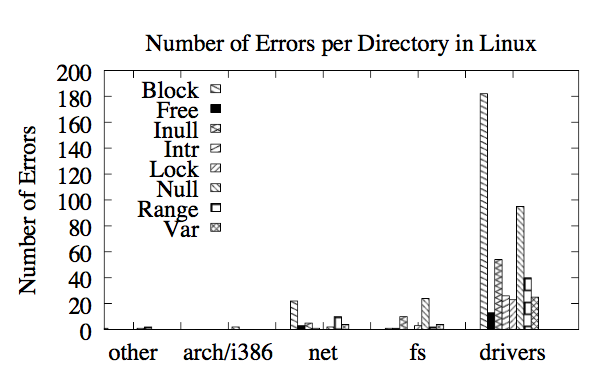
    <figcaption style="text-align: center;">
        <small>A <a href="https://pdos.csail.mit.edu/archive/6.097/readings/osbugs.pdf">study at Standford</a> in 2001 on automatically detecting and classifying errors in Linux: "Block" and "Lock" are concurrency-related.</small>
    </figcaption>
</figure>

### Example 2: Device Driver

Device drivers typically run in the operating system kernel and interface to mice, keyboards, drives, and other devices. As they run in the kernel, a faulty device driver can cause the whole operating system to crash.

- Around 2000, Windows shipped with 500 device drivers, most of them provided by device vendors. Reportedly, 80% of Windows crashes were traced back to faulty device drivers; concurrency errors (incorrect locking and releasing of resources etc.) were the most frequent.
- In the Linux 2.4.1 distribution, device drivers have 7 times more errors than the rest of the operating system. Among those, concurrency errors are the most frequent.

### Example 3: Northeast American Power Blackout, 14 August 2003

[World's second most widespread blackout in history:](https://en.wikipedia.org/wiki/Northeast_blackout_of_2003)
- 12:15 p.m. Incorrect power flow telemetry in Ohio detected, but not properly corrected.
- 1:31 p.m. Eastlake, Ohio generating plant shuts down.
- 2:02 p.m. First 345 kV line in Ohio fails due to contact with a tree.
- _2:14 p.m. An alarm system fails at FirstEnergy's control room._
- 2:27 p.m. A second 345 kV line fails due to a tree.
- …
- 4:10 p.m. Ontario separates from the western New York grid.
- 4:11 p.m. The Keith-Waterman, Bunce Creek-Scott 230 kV lines and the St. Clair–Lambton \#1 230 kV line and \#2 345 kV line between Michigan and Ontario fail.
- 4:12 p.m. Windsor, Ontario, and surrounding areas drop off the grid.
- 4:12 p.m. Northern New Jersey separates its power-grids from New York and the Philadelphia area, causing a cascade of failing secondary generator plants along the New Jersey coast and throughout the inland regions west.
- 4:13 p.m. End of cascading failure. 256 power plants are off-line, 85% of which went offline after the grid separations occurred, most due to the action of automatic protective controls.

10 million people in Ontario and 45 million people in eight U.S. states without power

Task Force Report:
>	… a software bug in General Electric Energy's Unix-based XA/21 energy management system that prevented alarms from showing on their control system. _This alarm system stalled because of a race condition_. After the alarm system failed silently without being noticed by the operators, unprocessed events (that had to be checked for an alarm) started to queue up and the primary server failed within 30 minutes.

[Scientific American:](https://www.scientificamerican.com/article/2003-blackout-five-years-later/)
> The event contributed to at least 11 deaths and cost an estimated $6 billion.

### Example 4: Therac-25

Nancy Leveson and Clark Turner, _[An Investigation of the Therac-25 Accidents](http://ieeexplore.ieee.org/document/274940/)_, 1993:

> Some of the most widely cited software-related accidents in safety-critical systems involved a computerized radiation therapy machine called the Therac-25. Between June 1985 and January 1987, six known accidents involved massive overdoses by the Therac-25 - with resultant deaths and serious injuries. They have been described as the worst series of radiation accidents in the 35-year history of medical accelerators.

> ...

> It is clear from the AECL [Atomic Energy of Canada Limited] documentation on the modifications that the software allows concurrent access to shared memory, that there is no real synchronization aside from data stored in shared variables, and that the "test" and "set" for such variables are not indivisible operations. _Race conditions resulting from this implementation of multitasking played an important part in the accidents._

## 3. Why is Concurrent Programming Getting More Prevalent?

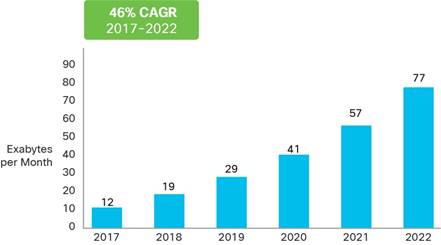</img>

### 1. Increase in Internet Traffic (if it needs to be said)

[Cisco Global Mobile Data Traffic Forecast, February 2019:](https://www.cisco.com/c/en/us/solutions/collateral/service-provider/visual-networking-index-vni/mobile-white-paper-c11-520862.html)

Global mobile data traffic grew 63 percent in 2016. The compound annual growth rate (CAGR) is predicted to be 46 percent from 2017 to 2022. (1 Exabyte = 10¹⁸ bytes.)

### 2. Increase in number of processor cores
<a href="https://www.karlrupp.net/2015/06/40-years-of-microprocessor-trend-data/">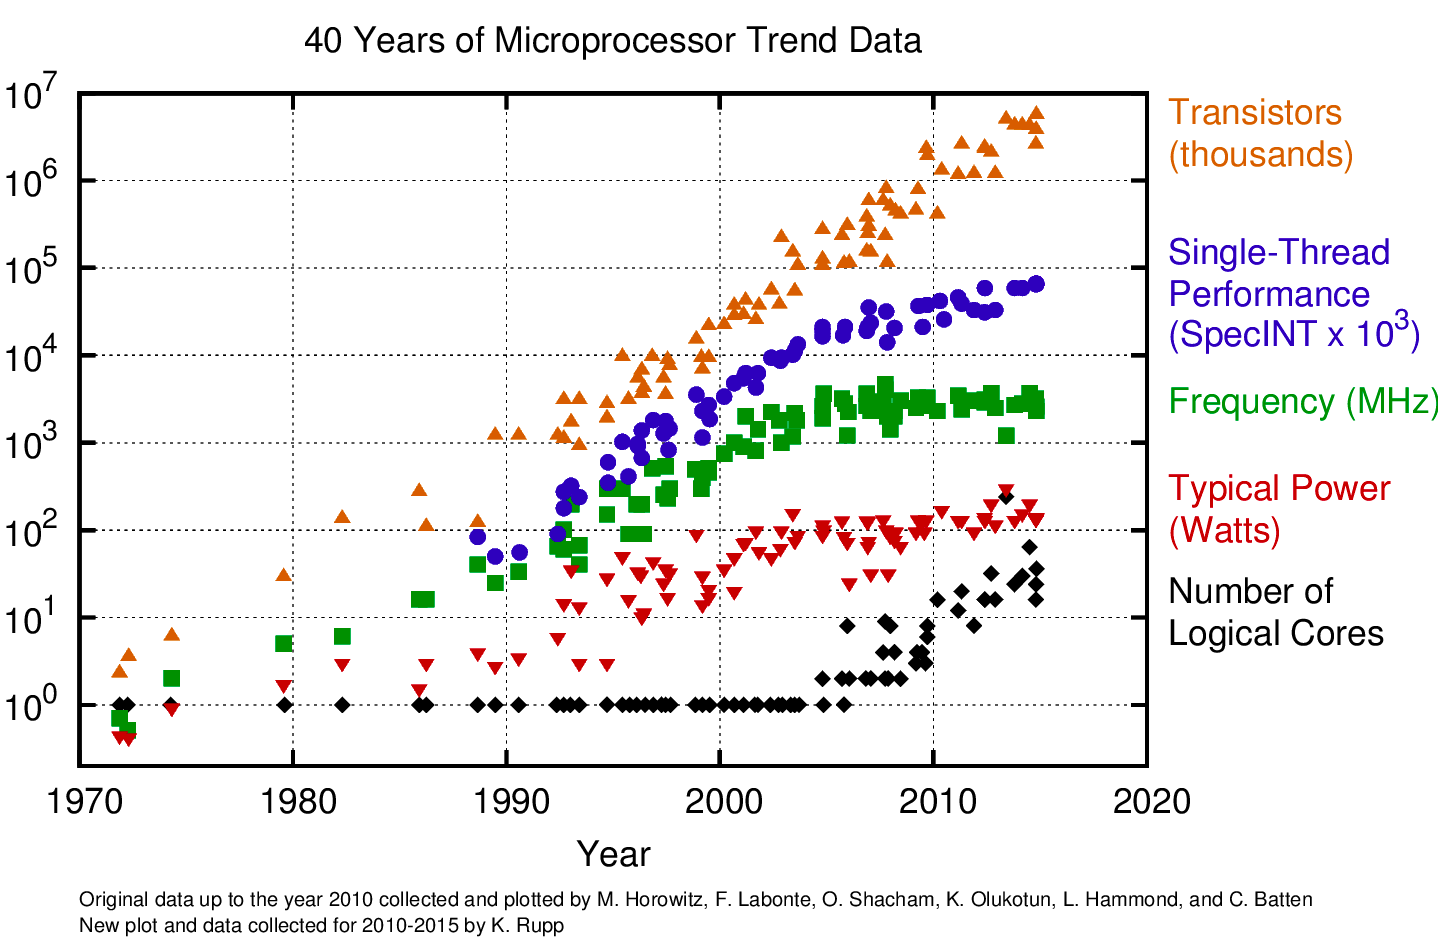</a>

_Processor frequency_ is no longer increasing due to the power wall. For CMOS circuits:

`
Power = Capacitive load ×
        Voltage² ×
        Frequency
`

_Single-thread performance_ is no longer increasing: the benefits of caching, pipelining, etc. are maxed out.

_Number of transitors_ per processor is still increasing–linearly on a logarithmic scale, i.e. exponentially, doubling every 18 months as predicted by Gordon Moore.

_This allow for more cores_.

Further reading: Peter Denning and Ted Lewis, [_Exponential Laws of Computing Growth_](https://cacm.acm.org/magazines/2017/1/211094-exponential-laws-of-computing-growth/fulltext), 2017.

## 4. What can we do about it?

### Libraries

Libraries hide some of the complexity for specific applications, e.g.
- efficient implementation of *data structures*: [Java](http://gee.cs.oswego.edu/dl/concurrency-interest/index.html)
- *parallel computing*: [MPI (Message Passing Interface)](https://en.wikipedia.org/wiki/Message_Passing_Interface), [OpenMP](http://www.openmp.org/)
- *distributed computing*: [Akka](http://akka.io/) for reliability and load balancing

These are useful in practice, but limited to the intended applications.

### Verification tools

Microsoft's [VCC](https://github.com/Microsoft/vcc) is one such tool:

> VCC is a mechanical verifier for concurrent C programs. VCC takes a C program, *annotated with function specifications, data invariants, loop invariants, and ghost code*, and tries to prove these annotations correct. If it succeeds, VCC promises that your program actually meets its specifications.

It's main use is for Microsoft's [Hyper-V](https://www.microsoft.com/en-us/research/project/vcc-a-verifier-for-concurrent-c/) hypervisor. Try out VCC online at: http://rise4fun.com/vcc

Similar tools for Java and other languages exist. They are mainly used for highly-critical software, despite the fact that these tools dramatically reduce the time for testing and can even reduce development and maintenance effort.

### Static analysis tools

Unlike verification tools, static analysis tools find errors without needing annotation. However, they can't find all errors (*incomplete*) and may produce false warnings (*unsound*).

For detecting concurrency errors in Windows:
- Device drivers have to pass the [Static Driver Verifier](https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/introducing-static-driver-verifier) (called so because there is also a dynamic verifier that detects driver errors at run-time), a static analysis tools that emerged from the [SLAM](https://www.microsoft.com/en-us/research/project/slam/) research project.
- Visual Studio for C/C++ includes a tool for [Code Analysis](https://docs.microsoft.com/en-us/visualstudio/code-quality/analyzing-c-cpp-code-quality-by-using-code-analysis), which report [numerous errors](https://docs.microsoft.com/en-us/visualstudio/code-quality/mixed-recommended-rules-rule-set): the concurrency errors start at C26100.

For detecting concurrency errors in Java:
- [NASA Java PathFinder](http://babelfish.arc.nasa.gov/trac/jpf): free, large, extensive checking
- [ThreadSafe](http://www.contemplateltd.com/): newer, commercial, specifically for concurrency errors
- [FindBugs](http://findbugs.sourceforge.net/): open source, several categories of errors: [results from some applications](http://findbugs.sourceforge.net/demo.html)
- [IBM Concurrency Benchmark](http://researcher.watson.ibm.com/researcher/view_person_subpage.php?id=5722): a set of programs with concurrency bugs, to evaluate tools

Despite their drawbacks, static analysis tools have become popular in practice, e.g. https://scan.coverity.com/ as they still reduce testing time significantly, don't require training, and fit in existing development processes.

### Dynamic analysis tools

[ThreadSanitizer](https://github.com/google/sanitizers/wiki/ThreadSanitizerCppManual) is one such tool, developed by Google, and included in [clang](https://clang.llvm.org/docs/ThreadSanitizer.html):
> ThreadSanitizer is a tool that detects data races. It consists of a compiler instrumentation module and a run-time library.

From a Google report "[How Developers Use Data Race Detection Tools](http://dl.acm.org/citation.cfm?id=2688205)", 2014:
> [ThreadSanitizer] regularly finds critical bugs, and is in wide use across Google ... . One interesting incident occurred in the open source Chrome browser. Up to 15% of known crashes were attributed to just one bug ..., which proved difficult to understand–the Chrome engineers spent over 6 months tracking this bug without success. On the other hand, the [ThreadSanitizer] team found the reason for this bug in a 30 minute run, without even knowing about these crashes. The crashes were caused by data races on a couple of reference counters.

ThreadSanitizer is included in [Xcode](https://developer.apple.com/videos/play/wwdc2016/412/). From Apple's [developer documentation](https://developer.apple.com/documentation/code_diagnostics/thread_sanitizer):
> Running your code with Thread Sanitizer checks enabled can result in CPU slowdown of 2⨉ to 20⨉, and an increase in memory usage by 5⨉ to 10⨉.

### New programming languages

- [Go](https://golang.org/): message passing over _sychronous_ and *asynchronous channels*, static analysis for race detection of shared variables.<br> Developed by Google; used by [Netflix](https://github.com/Netflix?language=go), [many others](https://github.com/golang/go/wiki/GoUsers)
- [Erlang](https://www.erlang.org/): functional concurrent language, _actors_ with message passing over asynchronous channels. <br>
Developed by Ericsson; used for [WhatsApp](https://www.fastcompany.com/3026758/inside-erlang-the-rare-programming-language-behind-whatsapps-success) (also [here](https://www.wired.com/2015/09/whatsapp-serves-900-million-users-50-engineers/)), [FaceBook Chat](), [Amazon SimpleDB](https://en.wikipedia.org/wiki/Amazon_SimpleDB), [Cisco Network Configuration](http://www.cse.chalmers.se/edu/year/2016/course/TDA383_LP3/files/lectures/ConsTAhs-20170301.pdf)
- [Scala](http://scala-lang.org/): functional object-oriented language, _futures_ for background computation, actors, data-parallel operations on collections. <br>
Developed by EPFL; used for [Apache Spark](https://spark.apache.org/), [Twitter](https://github.com/search?q=org%3Atwitter&type=Repositories&utf8=%E2%9C%93), [Duolingo](http://making.duolingo.com/rewriting-duolingos-engine-in-scala)
- [Clojure](https://clojure.org/): functional concurrent language, message passing over synchronous and asynchronous channels, _transactions_ for shared state.<br> Used at [Walmart](http://blog.cognitect.com/blog/2015/6/30/walmart-runs-clojure-at-scale)
- [Rust](https://www.rust-lang.org/): has a type system with _ownership_ to make both message passing and shared variables safer.<br>
Developed by Mozilla for [FireFox](http://www.infoworld.com/article/3165424/web-browsers/mozilla-binds-firefoxs-fate-to-the-rust-language.html); used by [Coursera, Dropbox, Samsung, ...](https://www.rust-lang.org/en-US/friends.html)

Further reading: Edward Lee, [_The Problem with Threads_](http://dl.acm.org/citation.cfm?id=1137289), 2006.

## 5. Dimensions of concurrency

In _multiprogramming_ several concurrent processes may be executed by multiplexing processors. In _multiprocessing_ several processors are sharing memory. In _distributed processing_ there are several processors without shared memory.

_Granularity_ of atomic operations can reach from nanoseconds (for arithmetic operations) to days. For very fine-grained concurrency the overhead of starting processes outweighs the benefit, for example evaluating parameters of the calls `p(x + y, x - y)` in parallel.

_Coupling_ can be _loose_ or _tight_. For very tightly coupled programs the overhead of communication and synchronization outweighs the benefit: for example, sorting an array with one process for each array element.

Coupling can be between processes can be *independent*, *regular*, or *general*.
- Independent concurrency: For arrays `a`, `b`, `c`, the vector addition
```algorithm
  c := a + b
```
- Regular concurrency: For array `a` repacing each element with the average of its neighbours
```algorithm
  a[i] := (a[i - 1] + a[i + 1]) / 2
```

Some compilers, notably Fortran compilers can recognize independent or regular concurrency and automatically generate code for vector processors that perform the same operation on a number of elements, leading to _data parallelism_.

The main concern for independent and regular concurrency is *performance*, for general concurrency it is *correctness*.

## 5. What this course is about

The practice of concurrency is changing quickly. The emphasis is on
- _general concurrency_ (independent and regular concurrency in courses on parallel and distributed programming),
- the _fundamentals of concurrency_ and seeing how they _apply to current languages_, and
- _correctness_ of concurrent programs.

This notes use _algorithmic notation_ for brevity and clarity in addition to examples in Python, Java, and Go. For example, setting `x` to `1` and _in parallel_ `y` to `2` is expressed as:

```algorithm
    x := 1 ‖ y := 2
```

The assignment `x := e`, also written as `x ← e`, is read `x` becomes `e` or `x` gets `e`.

To illustrate the verbosity of programming languages, here is the same in Python, with a print statement added. For both assignments, classes need to be declared, objects created, threads started, and awaited for termination. (Select the cell and run the program with control-return).

In [ ]:
from threading import Thread

class SetX(Thread):
    def run(self):
        global x; x = 1

class SetY(Thread):
    def run(self):
        global y; y = 2

setX = SetX(); setY = SetY() # create new threads
setX.start(); setY.start()   # run threads
setX.join(); setY.join()     # wait for threads to finish
print(x, y)

In Java, also classes need to be declared; additionally, exceptions need to be caught (select the cell and save the file with control-return; select the next cell and run the shell commands with control-return).

In [ ]:
%%writefile SetXY.java

public class SetXY {
    static int x, y;
    public static void main(String args[]) {
        class SetX extends Thread {
            public void run() {
                x = 1;
            }
        }
        class SetY extends Thread {
            public void run() {
                y = 2;
            }
        }
        Thread setX = new SetX(), setY = new SetY();
        setX.start(); setY.start();
        try {setX.join(); setY.join();}
        catch (Exception e) {};
        System.out.println(x + ", " + y);
    }
}

In [ ]:
!javac SetXY.java
!java SetXY

In Go, for each assignment a function needs to be declared, which below is anonymous. For awaiting the termination of both functions, a channel is introduced to which both functions send a dummy value; the main program waits for these values:

In [ ]:
%%writefile SetXY.go

package main

import "fmt"

func main() {
    var x, y int
    done := make(chan bool)
    go func() {x = 1; done <- true} ()
    go func() {y = 2; done <- true} ()
    <- done; <- done
    fmt.Println(x, y)
}

In [ ]:
!go run SetXY.go

We cover the main concurrency concepts:

- Nature of concurrency
- Mutual exclusion and condition sychronization
- Atomicity
- Safety, liveness, termination, deadlock, livelock, fairness
- Computer architecture and memory models
- Processes vs threads
- Critical sections
- Barrier synchronization
- Producers and consumers
- Readers and writers
- Bounded buffers
- Semaphores
- Monitors
- Message passing over synchronous and asynchronous channels
- Remote procedure call and rendezvous

The notes start with a review of program correctness.

Python and Java are used for semaphores and monitors, Go is used for message passing.

## 7. Recommended Reading

### Concurrency

- Allen Downey, [_The Little Book of Semaphores_](http://greenteapress.com/wp/semaphores/), 2016: free book with a trove of examples
- Gregory Andrews, [_Foundations of Multithreaded, Parallel, and Distributed Programming_](https://catalogue.pearsoned.ca/educator/product/Principles-of-Concurrent-and-Distributed-Programming/9780201357523.page), 2000: close to this course; get a used copy online
- Remzi Arpaci-Dusseau and Andrea Arpaci-Dusseau, [_Operating Systems: Three Easy Pieces_](http://ostep.org/), 2015: concise, free book; has one piece on concurrency with one chapter on concurrency bugs; uses C with Pthread
- Jeff Magee and Jeff Kramer, [_Concurrency: State Models & Java Programs, 2nd Edition_](https://www.doc.ic.ac.uk/~jnm/book/), 2006: used in previous editions of this course; uses message passing from the beginning; here message passing is covered later
- Mordechai Ben-Ari, [_Principles of Concurrent and Distributed Programming, 2nd Edition_](https://catalogue.pearsoned.ca/educator/product/Principles-of-Concurrent-and-Distributed-Programming/9780321312839.page), 2006: also close to this course, but goes into temporal logic and automated "model checking", which we don't

### Python
- John Guttag, [_Introduction to Computation and Programming Using Python, 2nd Edition_](https://mitpress.mit.edu/books/introduction-computation-and-programming-using-python-second-edition), 2016: focuses on methodological aspects rather than on the language; complements http://python.org

### Java
- John Guttag and Barbara Liskov, [_Program Development in Java: Abstraction, Specification, and Object-Oriented Design_](https://www.pearson.com/us/higher-education/program/Liskov-Program-Development-in-Java-Abstraction-Specification-and-Object-Oriented-Design/PGM283882.html), 2001: also focuses on methodological aspects rather than on the language

### Go
- Alan Donovan and Brian Kernighan, [_The Go Programming Language_](http://www.gopl.io/), 2015: authoritative book on Go
- https://golang.org/doc/: official Go documentation
- https://github.com/golang/go/wiki/Learn: further online learning tools

## 8. How to fail (or do poorly) in this course

- *Not attending classes (and not submitting M&Ms):* there is a strong correlation between the number of submitted M&Ms and the grade in previous years. Even worse is faking M&Ms; we catch those.
- *Not going to the tutorials for solutions of assignments or to ask questions:* solutions are only discussed in tutorials; the TAs can't answer last minute questions by e-mail; proper explanations are too involved for communication by e-mail.
- *Using another IDE and pasting the code into Jupyter notebooks:* you can't get explanations on how to use Jupyter during tests; besides, you miss the points of "literate programming" and "reproducible research".
- *Not completing the first two assignments and thinking to catch up:* the grading scheme is meant to allow you to make errors and still do well in the course, not to skip work.
- *Thinking that if your program produces the correct result it is correct:* you may have been just lucky with nondeterminism. If it is not correct under all possible interleavings, it is incorrect and you get zero.
- *Waiting until the night before the midterm test or final exam to study the material:* much of the material is like mathematics; you can't understand mathematics overnight.
